In [ ]:
import time
import numpy as np
import pandas as pd

from SA.simulatedAnnealing import simulatedAnnealing
from problems.TSP.SimulatedAnnelingOperationsTSP import SimulatedAnnelingOperationsTSP as TSP

from utils.calculations import Point
from utils.manipulationFile import read_txt_file
import utils.cooling as alpha
from utils.graphics import create_plot

# ponto ótimo 426 e 21282

In [13]:
def experiment(problem: str, path: str, num_interation: int, num_neighbors: int, SA_max: int, eq: int, TN: int, N: int) -> None:
    init = time.perf_counter()
    eq_dict = {
        0: alpha.cooling_schedule_0,
        1: alpha.cooling_schedule_1,
        2: alpha.cooling_schedule_2,
        3: alpha.cooling_schedule_3,
        4: alpha.cooling_schedule_4,
        5: alpha.cooling_schedule_5,
        6: alpha.cooling_schedule_6,
        7: alpha.cooling_schedule_7,
        8: alpha.cooling_schedule_8,
        9: alpha.cooling_schedule_9
    }
    
    solutions: list[int] = []
    
    dataset: dict = {}
    
    best_solution: int = 1_000_000
    best_list_interation: list[int]
    best_list_values: list[int]
    best_list_temperature: list[int]
    
    points: list[Point] = read_txt_file(path)

    tsp_t0: TSP = TSP(points)
    T0: float = tsp_t0.generate_T0_average(num_neighbors)
    
    for _ in range(0, num_interation):
        tsp: TSP = TSP(points)
        
        solution, list_interation, list_values, list_temperature = simulatedAnnealing(
            problem=tsp,
            alpha=eq_dict[eq],
            SA_max=1,
            T0=tsp.generate_T0_average(100),
            TN=0.001,
            N=10_000
        )
        
        solutions.append(solution.get_distance())
        
        print(solution.get_distance())
        
        if solution.get_distance() < best_solution:
            best_solution = solution.get_distance()
            best_list_interation = list_interation.copy()
            best_list_values = list_values.copy()
            best_list_temperature = list_temperature.copy()
    
    
    create_plot(
            title="Gráfico de Convergência do Simulated Anneling para TSP",
            xlabel="Interações",
            ylabel="Distância Percorrida",
            ax_label="Distância Percorrida",
            name="testeTSP.png",
            list_interation=best_list_interation,
            list_values=best_list_values,
            list_temperature=best_list_temperature,
            eq=eq
    )
    
    average = sum(solutions) / len(solutions)
    std = np.std(solutions)
    end = time.perf_counter()
            
    return problem, SA_max, eq, N, T0, best_solution, average, std, (end -init), solutions
    
    

873.9230975968071
880.0762557397611
834.0812533301847
820.2029802936089
823.8571558855772
872.4446887447915
954.5361522475042
949.2312810257076
876.0189208423818
886.2612136730583


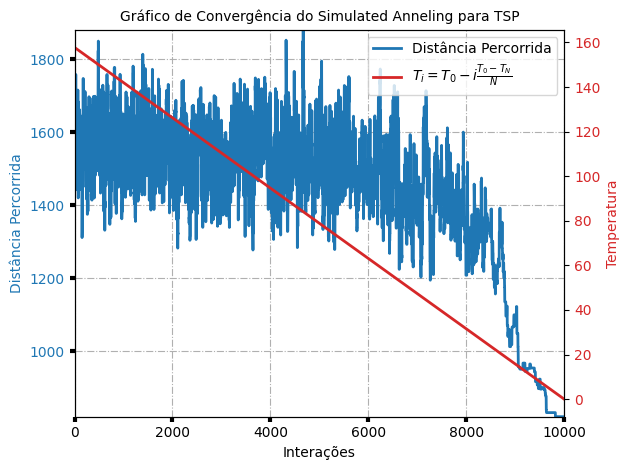

863.4549687419465
873.3881815853714
891.4403032038299
948.2037319720847
834.5630783814321
807.5125902978016
803.4051484263239
861.1593659210348
871.0129500060456
919.4570458045607


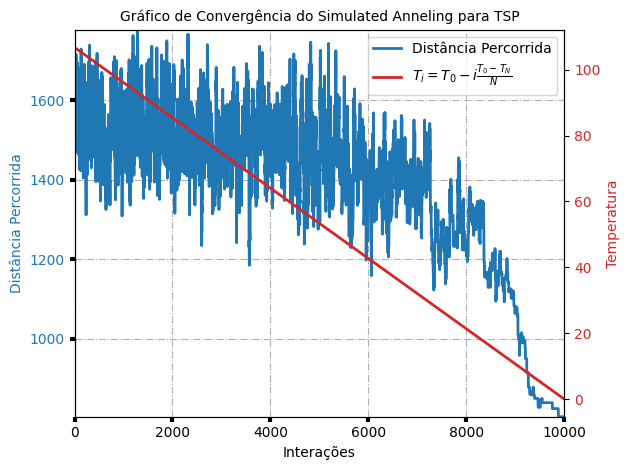

905.0140494941143
845.7104088176745
814.7791736109324
928.0652391974296
935.8385845822658
872.5234421433099
840.2569579589111
854.0112433227772
941.2748429348787
925.1650183989734


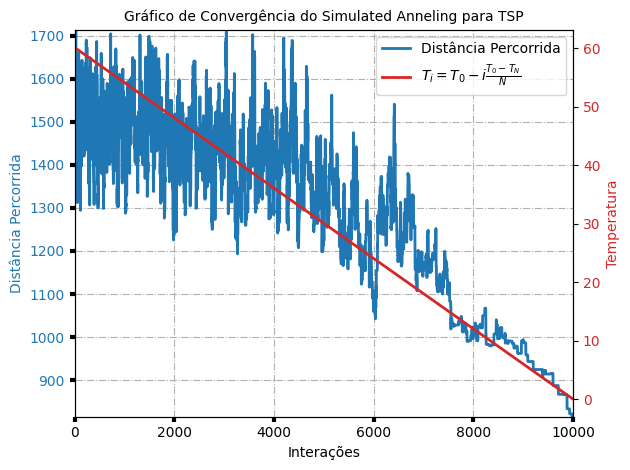

,Problema,SA_max,Equação,Número de Interações,Temperatura Inicial,Melhor Solução,Média,Desvio Padrão,Tempo (s)
0,TSP 51,1,0,1000,196.661171,820.202980,877.063300,43.872166,5.639667
1,TSP 51,5,0,1000,167.842560,803.405148,867.359736,43.221090,5.827971
2,TSP 51,10,0,1000,107.140888,814.779174,886.263896,43.813691,5.525057


In [14]:
d = {
    "Problema": [],
    "SA_max": [],
    "Equação": [],
    "Número de Interações": [],
    "Temperatura Inicial": [],
    "Melhor Solução": [],
    "Média": [],
    "Desvio Padrão": [],
    "Tempo (s)": [],
}

for sa in [1, 5, 10]:

    res = experiment(
        problem="TSP 51",
        path=PATH,
        num_interation=10,
        num_neighbors=100,
        SA_max=sa,
        eq=0,
        TN=0.001,
        N=1_000
    )

    d["Problema"].append(res[0])
    d["SA_max"].append(res[1])
    d["Equação"].append(res[2])
    d["Número de Interações"].append(res[3])
    d["Temperatura Inicial"].append(res[4])
    d["Melhor Solução"].append(res[5])
    d["Média"].append(res[6])
    d["Desvio Padrão"].append(res[7])
    d["Tempo (s)"].append(res[8])

df = pd.DataFrame(d)
df.to_csv("teste.csv")
df

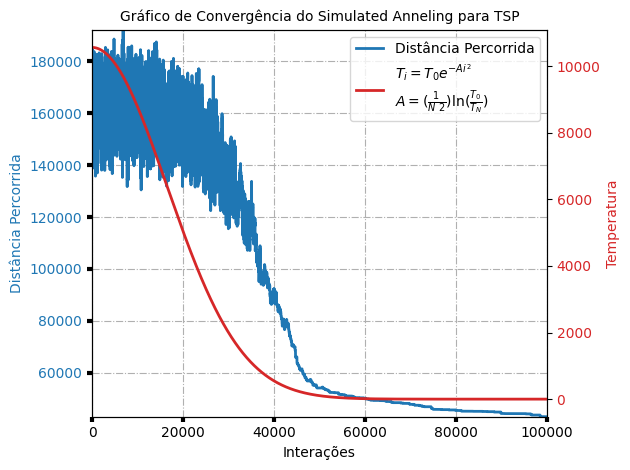

43087.8155379418

In [6]:
#  5, 8, 9

PATH: str = "samples/eil100.txt"

points: list[Point] = read_txt_file(PATH)

tsp: TSP = TSP(points)

solution, list_interation, list_values, list_temperature = simulatedAnnealing(
    problem=tsp,
    alpha=alpha.cooling_schedule_9,
    SA_max=1,
    T0=tsp.generate_T0_average(100),
    TN=0.000_1,
    N=100_000
)

create_plot(
    title="Gráfico de Convergência do Simulated Anneling para TSP",
    xlabel="Interações",
    ylabel="Distância Percorrida",
    ax_label="Distância Percorrida",
    name="testeTSP.png",
    list_interation=list_interation,
    list_values=list_values,
    list_temperature=list_temperature,
    eq=9
)

solution.get_distance()